In [2]:
import pandas as pd
csv_file_path = 'VA/census2021-ts066-ltla.csv'
df = pd.read_csv(csv_file_path)


In [3]:
import pandas as pd

data_family_composition = pd.read_csv('VA/census2021-ts003-ltla.csv')  # 家庭构成
data_density = pd.read_csv('VA/census2021-ts006-ltla.csv')  # 人口密度

data_birth_country = pd.read_csv('VA/census2021-ts004-ltla.csv')  # 出生国与移民背景数据
data_year_of_arrival = pd.read_csv('VA/census2021-ts015-ltla.csv')  # 到达英国的年份

data_education1 = pd.read_csv('VA/census2021-ts067-ltla.csv')  # 教育背景数据1
data_education2 = pd.read_csv('VA/census2021-ts068-ltla.csv')  # 教育背景数据2


In [4]:
import pandas as pd

data_family_composition = pd.read_csv('VA/census2021-ts003-ltla.csv')
data_density = pd.read_csv('VA/census2021-ts006-ltla.csv')

family_cols = [
    'geography code', 
    'Household composition: One person household; measures: Value'
]

density_cols = [
    'geography code', 
    'Population Density: Persons per square kilometre; measures: Value'
]
data_merged = pd.merge(data_family_composition[family_cols], data_density[density_cols], on='geography code', how='left')

data_education1['higher_education_ratio'] = data_education1['Highest level of qualification: Level 4 qualifications and above'] / data_education1['Highest level of qualification: Total: All usual residents aged 16 years and over']
data_education2['student_ratio'] = data_education2['Schoolchild or full-time student indicator: Student'] / data_education2['Schoolchild or full-time student indicator: Total: All usual residents aged 5 years and over']
education_cols = ['geography code', 'higher_education_ratio', 'student_ratio']
data_merged1 = pd.merge(
    data_education1[['geography code', 'higher_education_ratio']], 
    data_education2[['geography code', 'student_ratio']], 
    on='geography code'
)

birth_country_cols = [
    'geography code',
    'Country of birth: Europe; measures: Value',
    'Country of birth: Middle East and Asia; measures: Value',
    'Country of birth: The Americas and the Caribbean; measures: Value'
]
data_merged2 = data_birth_country[birth_country_cols]

data_final2 = pd.merge(pd.merge(data_merged, data_merged1, on='geography code', how='left'), data_merged2, on='geography code', how='left')
print(data_final2.columns)


Index(['geography code',
       'Household composition: One person household; measures: Value',
       'Population Density: Persons per square kilometre; measures: Value',
       'higher_education_ratio', 'student_ratio',
       'Country of birth: Europe; measures: Value',
       'Country of birth: Middle East and Asia; measures: Value',
       'Country of birth: The Americas and the Caribbean; measures: Value'],
      dtype='object')


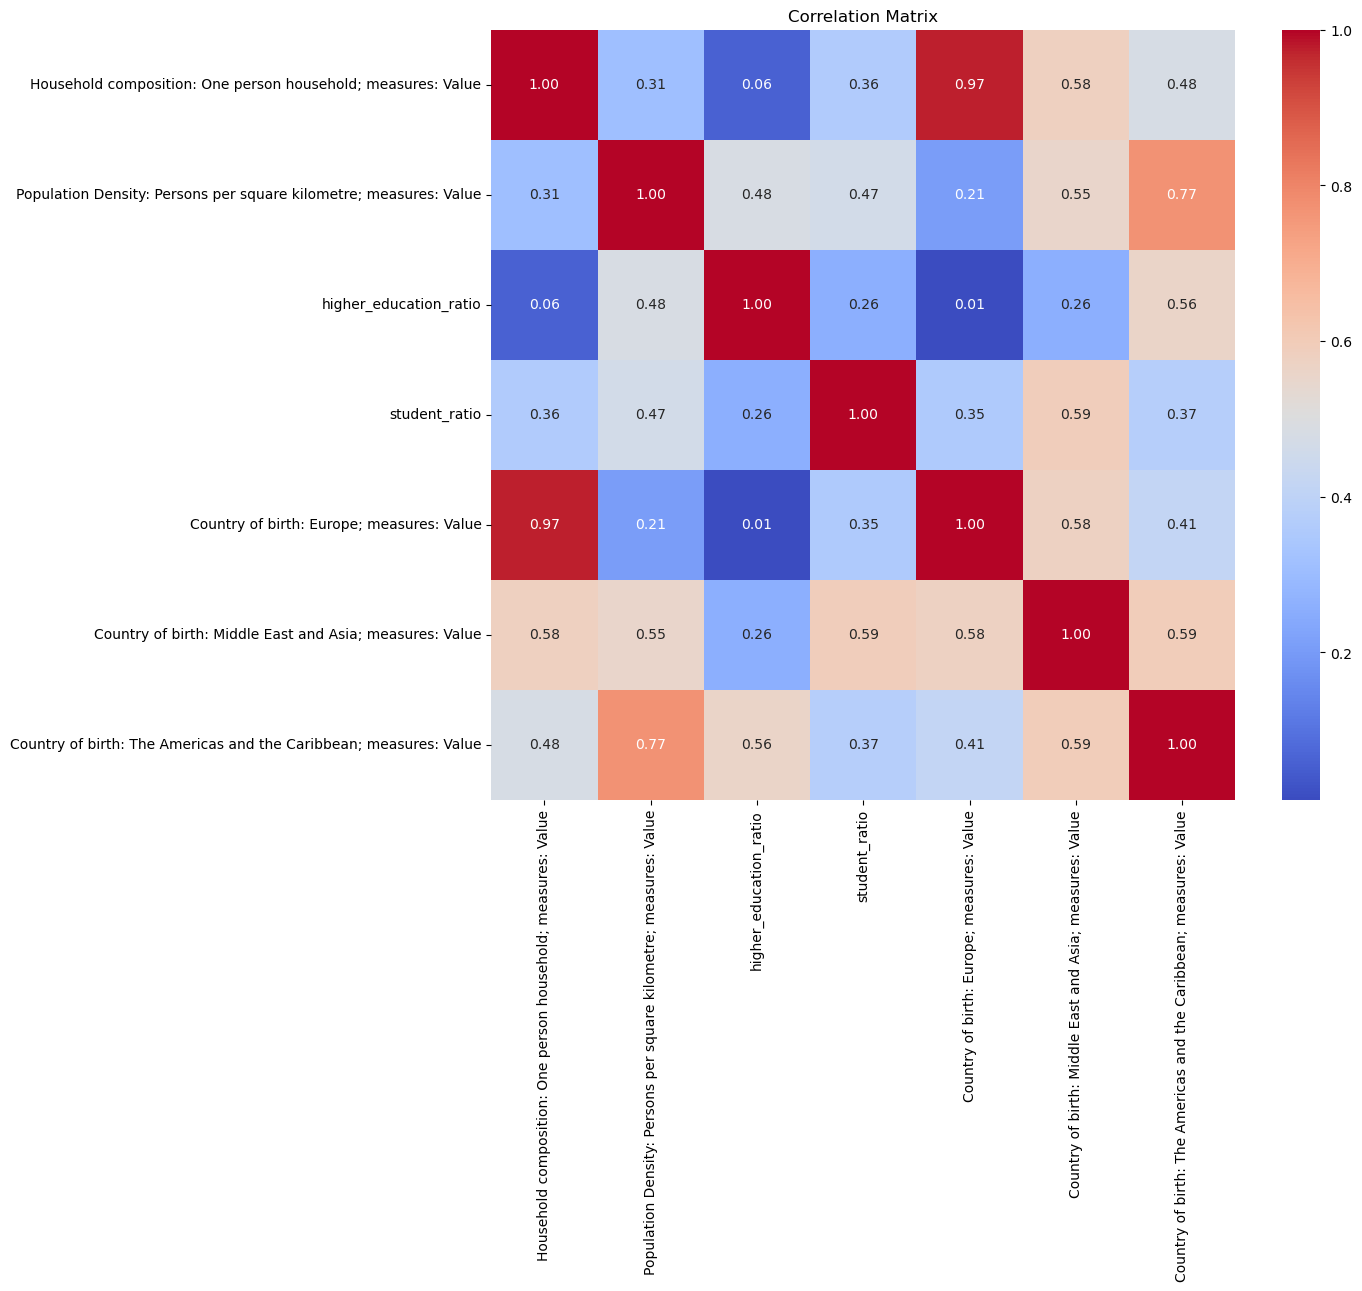

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

numeric_data = data_final2.select_dtypes(include=[np.number])  
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

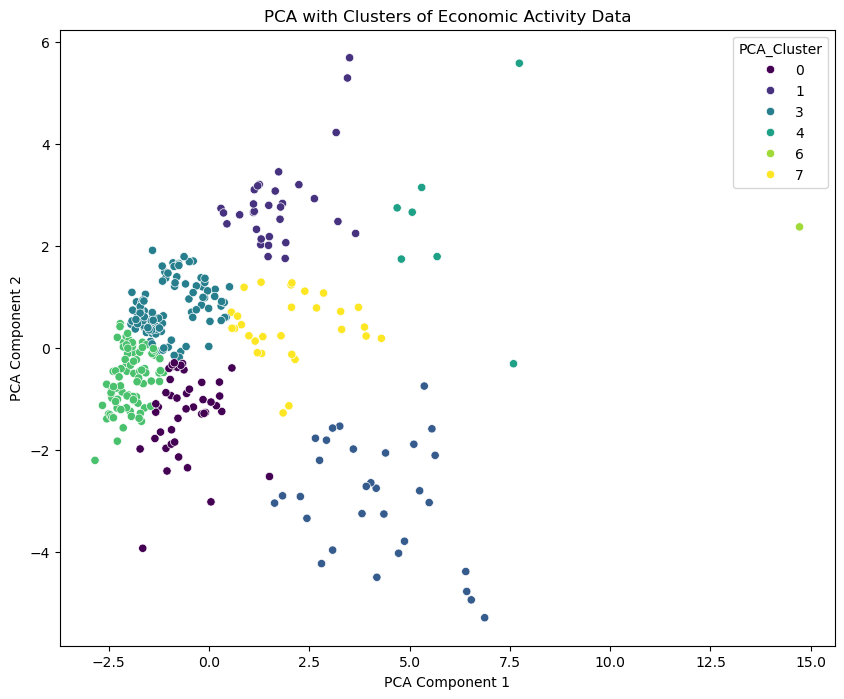

In [9]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

numeric_data = data_final2.select_dtypes(include='number')
scaler = StandardScaler()
numeric_data_scaled = scaler.fit_transform(numeric_data)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(numeric_data_scaled)


data_final2['PCA1'] = pca_result[:, 0]
data_final2['PCA2'] = pca_result[:, 1]

data_final2['PCA_Cluster'] = kmeans.fit_predict(pca_result)


plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', data=data_final2, hue='PCA_Cluster', palette='viridis')
plt.title('PCA with Clusters of Economic Activity Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()



In [7]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

numeric_data = data_final2.select_dtypes(include=[np.number])
scaler = StandardScaler()
numeric_data_scaled = scaler.fit_transform(numeric_data)

pca = PCA(n_components=2) 
pca.fit(numeric_data_scaled)

loading_scores = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=numeric_data.columns)
print("Loading Score (PCA Loading Matrix):")
print(loading_scores)

factor_loadings = loading_scores * np.sqrt(pca.explained_variance_)
print("\nfactor loading matrix:")
print(factor_loadings)


Loading Score (PCA Loading Matrix):
                                                         PC1       PC2
Household composition: One person household; me...  0.376714  0.377875
Population Density: Persons per square kilometr...  0.321260 -0.332549
higher_education_ratio                              0.184267 -0.363528
student_ratio                                       0.304778 -0.133342
Country of birth: Europe; measures: Value           0.361683  0.418572
Country of birth: Middle East and Asia; measure...  0.409864 -0.109297
Country of birth: The Americas and the Caribbea...  0.366241 -0.204030
PCA1                                                0.365362  0.412346
PCA2                                                0.248213 -0.444840

factor loading matrix:
                                                         PC1       PC2
Household composition: One person household; me...  0.806902  0.566436
Population Density: Persons per square kilometr...  0.688121 -0.498493
higher_education_

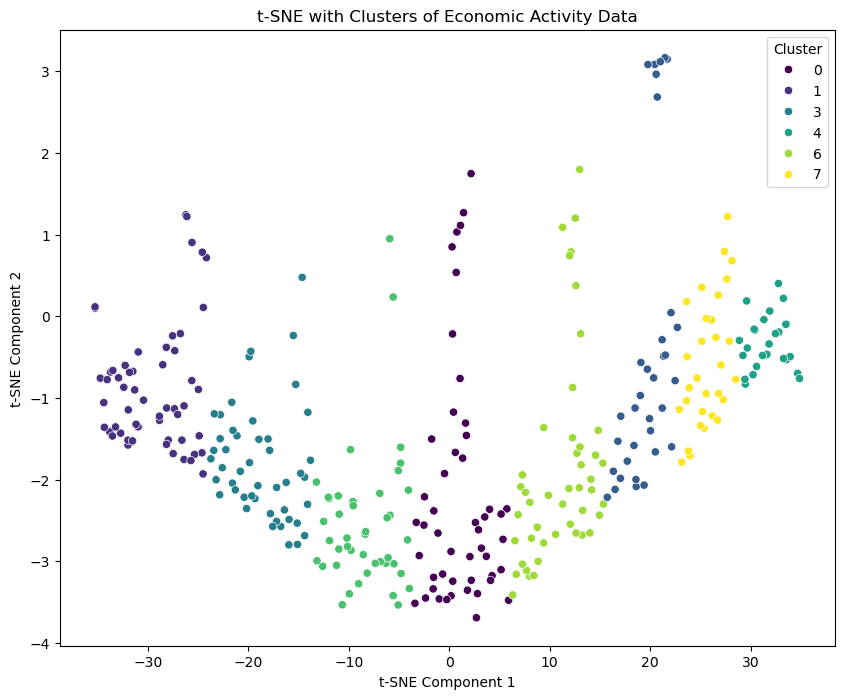

In [8]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(numeric_data)

data_final2['t-SNE1'] = tsne_result[:, 0]
data_final2['t-SNE2'] = tsne_result[:, 1]

kmeans = KMeans(n_clusters=8, random_state=42)  
data_final2['Cluster'] = kmeans.fit_predict(tsne_result)

plt.figure(figsize=(10, 8))
sns.scatterplot(x='t-SNE1', y='t-SNE2', data=data_final2, hue='Cluster', palette='viridis')
plt.title('t-SNE with Clusters of Economic Activity Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()
